<h3> Coding a basic Decision Tree with Scikit-Learn </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

- Importing Dataset

In [2]:
data = pd.read_csv('./Datasets/penguins_size.csv')

data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
92,Adelie,Dream,34.0,17.1,185.0,3400.0,FEMALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE


In [3]:
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [4]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

- Dropping Null values

In [5]:
data = data.dropna()

# adjusting excluding the unidentified penguin from the data.
data = data[data['sex']!='.']

In [6]:
X = pd.get_dummies(data.drop('species' , axis=1) , dtype=int , drop_first=True)
y = data['species']

- Decision Tree with Scikit-Learn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report , confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train , y_train)

base_pred = model.predict(X_test)
print(classification_report(y_test , base_pred))
print(confusion_matrix(y_test , base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

[[47  1  0]
 [ 1 17  0]
 [ 0  0 34]]


- Visualizing Decision Tree

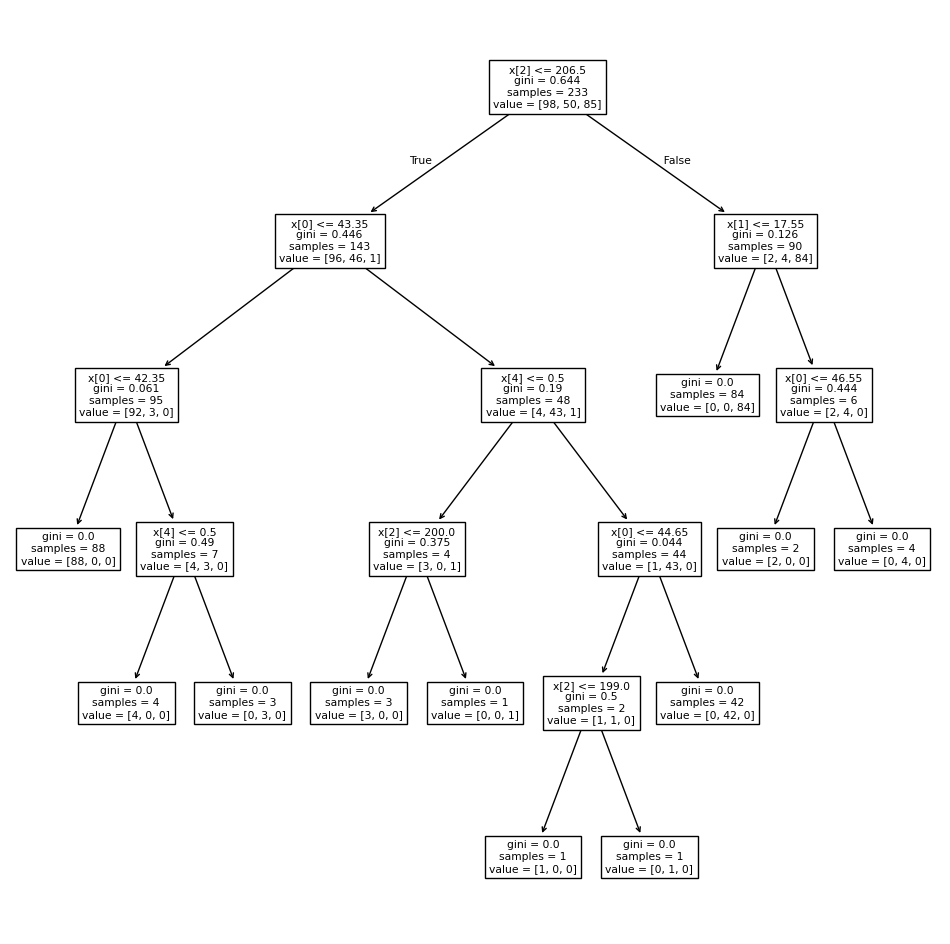

In [8]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=[12 , 12] , dpi=100)
plot_tree(model)
plt.show()